Download the dataset from this link : "https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/"

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/monet2photo.zip','r') as zip:
  zip.extractall('/content')

In [ ]:
!python /content/instancenormalization.py

2023-06-16 22:59:55.160266: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 22:59:58.771495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!pip install tensorflow

In [ ]:
!python /content/cyclegan_model.py

2023-06-16 23:00:05.185525: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 23:00:06.486876: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:

import tensorflow as tf
# monet2photo
from os import listdir
from numpy import asarray
from numpy import vstack
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from matplotlib import pyplot as plt
import numpy as np

# load all images in a directory into memory
def FUN_LOAD_IMAGE(DATA_PATH, size=(256,256)):
	LIST = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(DATA_PATH):
		# load and resize the image
		LOAD = load_img(DATA_PATH + filename, target_size=size)
		# convert to numpy array
		LOAD = img_to_array(LOAD)
		# store
		LIST.append(LOAD)
	return asarray(LIST)









In [ ]:
# dataset DATA_PATH
DATA_PATH = '/content/monet2photo/'

# load dataset A - Monet paintings
LOAD_DATA_A = FUN_LOAD_IMAGE(DATA_PATH + 'trainA/')
print('TRAIN_DATA_A: ', LOAD_DATA_A.shape)

from sklearn.utils import resample
#To get a subset of all images, for faster training during demonstration
TRAIN_DATA_A = resample(LOAD_DATA_A,
                 replace=False,
                 n_samples=50,
                 random_state=42)

# load dataset B - Photos
LOAD_DATA_B = FUN_LOAD_IMAGE(DATA_PATH + 'trainB/')
print('TRAIN_DATA_B: ', LOAD_DATA_B.shape)
#Get a subset of all images, for faster training during demonstration
#We could have just read the list of files and only load a subset, better memory management.
TRAIN_DATA_B = resample(LOAD_DATA_B,
                 replace=False,
                 n_samples=50,
                 random_state=42)

TRAIN_DATA_A:  (1072, 256, 256, 3)
TRAIN_DATA_B:  (6287, 256, 256, 3)


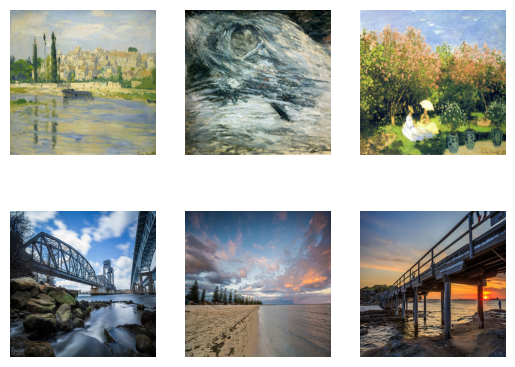

In [ ]:
# plot source images
NO_OF_IMAGES = 3
for i in range(NO_OF_IMAGES):
	plt.subplot(2, NO_OF_IMAGES, 1 + i)
	plt.axis('off')
	plt.imshow(TRAIN_DATA_A[i].astype('uint8'))
# plot target image
for i in range(NO_OF_IMAGES):
	plt.subplot(2, NO_OF_IMAGES, 1 + NO_OF_IMAGES + i)
	plt.axis('off')
	plt.imshow(TRAIN_DATA_B[i].astype('uint8'))
plt.show()



In [ ]:
# load image data
data = [TRAIN_DATA_A, TRAIN_DATA_B]

print('Loaded', data[0].shape, data[1].shape)


def preprocess_data(data):
	# load compressed arrays
	ARR_1, ARR_2 = data[0], data[1]
	# scale from [0,255] to [-1,1]
	ARR_1 = (ARR_1 - 127.5) / 127.5
	ARR_2 = (ARR_2 - 127.5) / 127.5
	return [ARR_1, ARR_2]


Loaded (50, 256, 256, 3) (50, 256, 256, 3)


In [ ]:
DATA_AS_IMG = preprocess_data(data)

from cyclegan_model import define_generator, define_discriminator, define_composite_model, train
# define input shape based on the loaded dataset
SHAPE_OF_IMG = DATA_AS_IMG[0].shape[1:]
# generator: A -> B
GEN_MODEL_A= define_generator(SHAPE_OF_IMG)
# generator: B -> A
GEN_MODEL_B = define_generator(SHAPE_OF_IMG)
# discriminator: A -> [real/fake]
DISCRIMINATOR_A = define_discriminator(SHAPE_OF_IMG)
# discriminator: B -> [real/fake]
DISCRIMINATOR_B = define_discriminator(SHAPE_OF_IMG)
# composite: A -> B -> [real/fake, A]
CHECK_REALORFACK_A = define_composite_model(GEN_MODEL_A, DISCRIMINATOR_B, GEN_MODEL_B, SHAPE_OF_IMG)
# composite: B -> A -> [real/fake, B]
CHECK_REALORFACK_B = define_composite_model(GEN_MODEL_B, DISCRIMINATOR_A, GEN_MODEL_A, SHAPE_OF_IMG)


# train models
train(DISCRIMINATOR_A, DISCRIMINATOR_B, GEN_MODEL_A, GEN_MODEL_B, CHECK_REALORFACK_A, CHECK_REALORFACK_B, DATA_AS_IMG, epochs=5)




/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 956ms/step
Iteration>1, dA[2.704,0.704] dB[1.128,0.851] g[18.349,22.172]
1/1 [==============================] - 0s 37ms/step
Iteration>2, dA[1.855,0.819] dB[5.381,1.217] g[18.420,18.389]
1/1 [==============================] - 0s 22ms/step
Iteration>3, dA[2.015,1.905] dB[3.767,0.773] g[18.795,20.209]
1/1 [==============================] - 0s 23ms/step
Iteration>4, dA[5.878,1.746] dB[7.198,0.993] g[18.182,20.652]
1/1 [==============================] - 0s 24ms/step
Iteration>5, dA[5.316,1.288] dB[3.249,3.847] g[25.007,20.610]
1/1 [==============================] - 0s 24ms/step
Iteration>6, dA[7.063,1.036] dB[3.212,3.627] g[21.385,17.950]
1/1 [==============================] - 0s 24ms/step
Iteration>7, dA[2.045,1.589] dB[1.309,1.158] g[16.892,17.057]
1/1 [==============================] - 0s 39ms/step
Iteration>8, dA[7.203,1.442] dB[0.973,3.921] g[21.194,17.850]
1/1 [==============================] - 0s 22ms/step
Iteration>9, dA[11.586,1.350] dB[5.

>Saved: g_model_AtoB_000250.h5 and g_model_BtoA_000250.h5


In [ ]:
############################################

# Use the saved cyclegan models for image translation
from instancenormalization import InstanceNormalization
from keras.models import load_model
from matplotlib import pyplot
from numpy.random import randint

# select a random sample of images from the dataset
def TAKE_RANDOM_IMG(DATA_AS_IMG, NO_OF_IMAGES):
	# choose random instances
	INDEX= randint(0, DATA_AS_IMG.shape[0], NO_OF_IMAGES)
	# retrieve selected images
	RETRIEVE = DATA_AS_IMG[INDEX]
	return RETRIEVE

# plot the image, its translation, and the reconstruction
def PLOT_THE_IMAGE(REAL_IMAGES, GENERATED_IMAGES, RECONSTRUCTED_IMAGES):
	SCALE_IMAGES = vstack((REAL_IMAGES, GENERATED_IMAGES, RECONSTRUCTED_IMAGES))
	IMAGE_TITLE = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	SCALE_IMAGES = (SCALE_IMAGES + 1) / 2.0
	# plot images row by row
	for i in range(len(SCALE_IMAGES)):
		# define subplot
		pyplot.subplot(1, len(SCALE_IMAGES), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(SCALE_IMAGES[i])
		# title
		pyplot.title(IMAGE_TITLE[i])
	pyplot.show()









In [ ]:
# load dataset
from sklearn.utils import resample
TEST_DATA_A = resample(LOAD_DATA_A,
                 replace=False,
                 n_samples=50,
                 random_state=42) # reproducible results

TEST_DATA_B = resample(LOAD_DATA_B,
                 replace=False,
                 n_samples=50,
                 random_state=42) # reproducible results

TEST_DATA_A = (TEST_DATA_A - 127.5) / 127.5
TEST_DATA_B = (TEST_DATA_B - 127.5) / 127.5


In [ ]:
# load the models
LOAD_MODELS = {'InstanceNormalization': InstanceNormalization}
MODEL_FOR_GEN_A = load_model('/content/g_model_AtoB_002000.h5', LOAD_MODELS)
MODEL_FOR_GEN_B = load_model('/content/g_model_BtoA_002000.h5', LOAD_MODELS)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


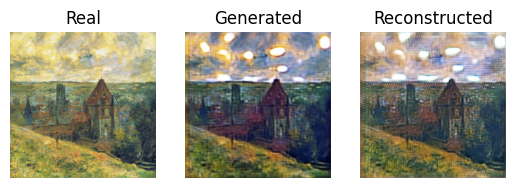

1/1 [==============================] - 0s 22ms/step


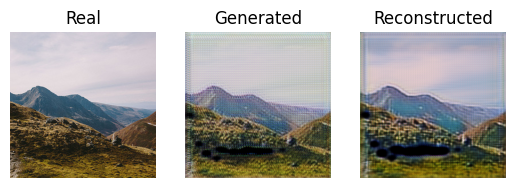

In [ ]:
# plot A->B->A (Monet to photo to Monet)
REAL_IMG_GEN_A = TAKE_RANDOM_IMG(TEST_DATA_A, 1)
GEN_IMG_B  = MODEL_FOR_GEN_A.predict(REAL_IMG_GEN_A)
RECONSTRUCT_IMG_A = MODEL_FOR_GEN_B.predict(GEN_IMG_B)
PLOT_THE_IMAGE(REAL_IMG_GEN_A, GEN_IMG_B, RECONSTRUCT_IMG_A)
# plot B->A->B (Photo to Monet to Photo)
REAL_IMG_GEN_B = TAKE_RANDOM_IMG(TEST_DATA_B, 1)
GEN_IMG_A  = MODEL_FOR_GEN_B.predict(REAL_IMG_GEN_B)
RECONSTRUCT_IMG_B = MODEL_FOR_GEN_A.predict(GEN_IMG_A)
PLOT_THE_IMAGE(REAL_IMG_GEN_B, GEN_IMG_A, RECONSTRUCT_IMG_B)


1/1 [==============================] - 0s 35ms/step


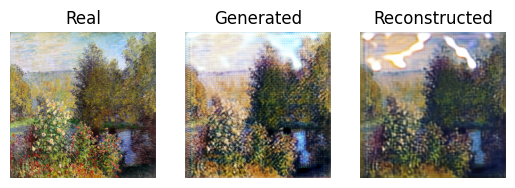

In [ ]:
##########################
#Load a single custom image
TEST_THE_LOADED_IMAGES = load_img('/content/monet2photo/trainA/00001.jpg')
TEST_THE_LOADED_IMAGES = img_to_array(TEST_THE_LOADED_IMAGES)
IMAGE_TO_BATCH = np.array([TEST_THE_LOADED_IMAGES])  # Convert single image to a batch.
IMAGE_TO_BATCH = (IMAGE_TO_BATCH - 127.5) / 127.5

# plot B->A->B (Photo to Monet to Photo)
PHOTO_TO_MONET_GENERATED  = MODEL_FOR_GEN_B.predict(IMAGE_TO_BATCH)
RECONSTRUCT_IMG_MONET_TO_PHOTO = MODEL_FOR_GEN_A.predict(PHOTO_TO_MONET_GENERATED)
PLOT_THE_IMAGE(IMAGE_TO_BATCH, PHOTO_TO_MONET_GENERATED, RECONSTRUCT_IMG_MONET_TO_PHOTO)

Here is my google drive folder link for Project Folder: https://drive.google.com/drive/folders/1-xMiGTprhhudbYwZUidlsXJ2JWx2HMYo?usp=drive_link